## Python Basic 

In [1]:
a = 3
b = 2
a + b

5

In [2]:
a + 8

11

## 英文斷詞

In [3]:
s = 'this is a book'
s.split()

['this', 'is', 'a', 'book']

## 安裝Jieba

In [4]:
! pip install jieba

You are using pip version 9.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


## 中文斷詞

In [5]:
import jieba

s = '酸民婉君也可以報名嗎?'
list(jieba.cut(s))

Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/46/b7dzk4mn6g54qzptv608w7d00000gn/T/jieba.cache
Loading model cost 1.001 seconds.
Prefix dict has been built succesfully.


['酸民婉君', '也', '可以', '報名', '嗎', '?']

In [6]:
s = '''
有外貌美麗如女星范冰冰的馮姓女子2008年與陳姓富二代訂婚後無故悔婚，但馮女不告而別2年後，忽然回頭請陳男金援，癡情的陳男不但不計前嫌，對馮女數十次索討生日、情人節等禮物及資助學費等一概答應，竟連她結婚生子後要求生活費，也大方匯給10萬元，直到陳男也結婚，妻發現他竟贈百萬名畫給馮女，陳男才在妻逼迫下告馮女詐欺、侵占，並請求返還借款533萬餘元，但檢方認定陳男自願贈與，將馮女不起訴，台北地院也僅認定2013年間馮女謊稱買房討「房貸頭期款」部分陳男求償有理，判馮女須賠60萬元。
'''

In [11]:
import re
re.split('，|、|。|「|」|\n', s)

['',
 '有外貌美麗如女星范冰冰的馮姓女子2008年與陳姓富二代訂婚後無故悔婚',
 '但馮女不告而別2年後',
 '忽然回頭請陳男金援',
 '癡情的陳男不但不計前嫌',
 '對馮女數十次索討生日',
 '情人節等禮物及資助學費等一概答應',
 '竟連她結婚生子後要求生活費',
 '也大方匯給10萬元',
 '直到陳男也結婚',
 '妻發現他竟贈百萬名畫給馮女',
 '陳男才在妻逼迫下告馮女詐欺',
 '侵占',
 '並請求返還借款533萬餘元',
 '但檢方認定陳男自願贈與',
 '將馮女不起訴',
 '台北地院也僅認定2013年間馮女謊稱買房討',
 '房貸頭期款',
 '部分陳男求償有理',
 '判馮女須賠60萬元',
 '',
 '']

## Jieba

In [18]:
import jieba
?jieba.cut

In [13]:
s = '大巨蛋案對市府同仁下封口令？　柯P否認'

In [14]:
jieba.cut(s)

<generator object Tokenizer.cut at 0x10b1f0360>

In [15]:
seg_list = jieba.cut(s)

In [16]:
for w in seg_list:
    print(w)

大
巨蛋
案對
市府
同仁
下
封口令
？
　
柯
P
否認


In [17]:
seg_list = jieba.cut(s)
list(seg_list)

['大', '巨蛋', '案對', '市府', '同仁', '下', '封口令', '？', '\u3000', '柯', 'P', '否認']

In [20]:
seg_list = jieba.cut(s, cut_all=True)
print(list(seg_list))

['大', '巨蛋', '案', '對', '市府', '同仁', '下', '封口', '封口令', '口令', '', '', '', '柯', 'P', '否', '認']


In [21]:
import jieba
jieba.load_userdict('userdict.txt')
seg_list = jieba.cut(s)
list(seg_list)

['大巨蛋', '案對', '市府', '同仁', '下', '封口令', '？', '\u3000', '柯P', '否認']

## Jieba ZH_TW
- https://github.com/ldkrsi/jieba-zh_TW
- 解壓縮以後蓋過原本Jieba 位置：C:\ProgramData\Anaconda3\Lib\site-packages\jieba

In [22]:
import jieba.posseg as pseg
words = pseg.cut("大巨蛋案對市府同仁下封口令？　柯P否認")
for w in words:
    print(w.word, w.flag)


大巨蛋 N
案 ng
對 p
市府 N
同仁 N
下 POST
封口令 x
？ x
　 x
柯P N
否認 v


In [23]:
import jieba.posseg as pseg
jieba.load_userdict('userdict.txt')
words = pseg.cut("大巨蛋案對市府同仁下封口令？　柯P否認")
for w in words:
    print(w.word, w.flag)


大巨蛋 N
案 ng
對 p
市府 N
同仁 N
下 POST
封口令 n
？ x
　 x
柯P N
否認 v


In [25]:
sentence = "大巨蛋案對市府同仁下封口令？　柯P否認"
words = jieba.tokenize(sentence)

for tw in words:
    print(tw[0], tw[1], tw[2])


大巨蛋 0 3
案對 3 5
市府 5 7
同仁 7 9
下 9 10
封口令 10 13
？ 13 14
　 14 15
柯P 15 17
否認 17 19


## 使用網路爬蟲擴增字典

In [29]:
import requests
from bs4 import BeautifulSoup
res = requests.get('https://ec.ltn.com.tw/article/breakingnews/2802311')
soup = BeautifulSoup(res.text, 'html.parser')
words = soup.select_one('meta[name="keywords"]')['content'].split(',')

In [31]:
with open('userdict.txt', 'a') as f:
    f.write('\n')
    for w in words:
        f.write(w+'\n')

## 文字量化分析

In [32]:
speech = '''
各位國人同胞，記者朋友，大家早安。

今天，雨下得很大，我希望國人同胞要注意交通安全，我也請蘇院長及行政團隊要做好必要的準備。

今天是我就職滿三年，我有一些感想，要和各位分享。

前天星期六，台灣第一座離岸風場，終於開始施工了。風機葉片現在就在台中港，等待運送到海上組裝。一切順利的話，我們在今年底就會完成這座風場，將會創下一個重要的里程碑。

再生能源的夢想，台灣談了十幾年。從我上任之後，三年來經過修法、簽約、議價、開工，才終於要實現。

另外，最近是報稅季節，我相信國人對於減稅的幅度非常「有感」。這是我和林全前院長，從上任一開始就反覆討論的計畫，從構想、規劃、立法、到實施，歷經三任閣揆，才讓大家感受到成果。

風電跟稅改的經驗，說明了兩件事。第一，這個政府不炒短線，認真做長遠規劃。第二，一個重要的政策，通常必須是「三年有成」，才會開花結果，但在這個之前，執政者必須忍受孤獨。

我必須承認，這三年來我承受很大的壓力，也經常承受壓力；但是我也有信心，第四年的時候，就是我們一起收穫的開始。

我再講幾個例子。為了年金改革，我忍受了三年的謾罵，但是換來年金至少三十年不會破產，政府會有更多資源來照顧更多的人。

還有前瞻基礎建設計畫，當初很多人把它罵得一無是處，但是這些人中的很多人，現在都在收割成果。接下來大家會看到，基礎建設陸續完成，同時也創造出可觀的內需，支撐台灣經濟成長。

特別是在美中貿易戰的影響之下，內需會支撐台灣經濟穩定的成長。

幾個星期前，我去主持了「潛艦國造」專用廠房的動土典禮。台灣自己建造潛艦，是過去每一任總統的夢想，終於在我手中開始實現。

前陣子，我也參加了「福衛七號」裝箱運送的典禮。台灣人研發和製造的衛星，將可以貢獻最精準的氣象資料給全世界。台灣的太空科技，也幫助全人類觀測到黑洞的影像。

這個就是「三年有成」的概念，每一項成績都不是憑空出現，需要紮實的努力。

我要告訴三年來感到失望的朋友，只要多一點地耐心，你就會看見，我們做的事情比你想像得多很多。我也要告訴三年來不斷唱衰台灣的人，你們不會得逞。

很多關心蔡英文的朋友，認為我實在很傻。做得越多，被罵得越兇；做了一堆長遠規劃，短期都看不見。得罪人的事，別人都第二任再做、或乾脆不做，只有蔡英文第一任就做。

但是我必須要說，該做的事，就必須要做。如果第一任不敢做，第二任也不會有勇氣去做。我付出的政治代價確實很大，但如果我只做炒短線的事，這個國家就只會原地踏步，甚至是越來越衰弱。

我的目標只有一個，就是不讓台灣停留在過去。國際政治經濟局勢正在劇烈變化，我必須要把國家帶向未來。

就是因為這三年的努力，我們扭轉了過去的錯誤。如果我們延續國民黨「把經濟鎖在中國」的戰略，我要請問，在美中貿易戰的風險下，台灣憑什麼可以生存？

我們不斷幫台灣調整經濟體質，終於迎來了「投資大爆發」的時刻。外商加碼投資，台商競相回流，還有前瞻特別預算的投資帶動了內需成長。此外，都更、長照、綠能、國防產業，每一項內需的創造，都是未來的經濟基底，都是年輕人的工作機會。

過去三年，我們做了許多事，在重新定義台灣。我要請大家記住十個關鍵字：也就是「加薪減稅」、「擴大投資」、「產業升級」、「非核家園」、「綠色能源」、「年金改革」、「長照托育」、「社會住宅」、「國防自主」、「捍衛主權」。

這幾個關鍵字拼湊起來，就是台灣現在和過去最大的差別，也是國家未來的圖像。忙碌的三年，一千多個日子，就是為了這一刻。

也許是因為國際處境很艱難，台灣人對自己缺乏信心。但是國際社會一直看好我們。

台灣的經濟在成長，在穩定的成長，機會在增加。「世界經濟論壇」說，台灣總體經濟穩定是全球第一，創新能力也是亞洲第一。

因為美中貿易大戰，MIT，「Made in Taiwan」，重新成為熱門關鍵字。這就是下一個階段的國家總目標：

我們不只是要再一次擦亮 MIT 的招牌，更要在原來的基礎上，創造一個「MIT upgrade」，讓「台灣製造」不再只是零組件、代工，而是共同打造一個人工智慧、綠能、高科技，所有未來人類最好的生產和生活的「新經濟典範」。

因此，我希望在下一個任期，舉辦一場「台灣博覽會」，讓全世界的朋友，都看見「MIT upgrade」所帶來的綜合國力。

我們有太多傲視國際的軟實力，可以展現在世人的眼前。

例如，在智慧機械助攻之下，台灣機械產業產值突破兆元。物聯網也加入成為兆元產業。我們是全球 ICT 產業鏈中，品質最好的供應者。我們在生技醫藥產業的實力，同樣是居於領先地位。

經過三年努力，綠能產業將會帶動近兆元的投資。

潛艦國造、國機國造，會帶動國防產業鏈的發展。

隨著衛星的研發，就連太空產業也會蓬勃的發展。

這些，都是台灣未來長期的競爭力，也是年輕人就業的場域。

還有最重要的，台灣是世界上最安全資通產品的生產基地。

台灣也是世界上最活躍的高科技產品研發基地。

同時我要請大家不要忘記，我們的農業、文化、醫療、教育、社福制度，都有很多國家想來台灣學習取經。

「台灣製造」的招牌，一天比一天發亮。我相信一場「台灣博覽會」，不僅可以讓全世界都成為台灣的客戶，擴大各領域的合作商機，突顯台灣的軟實力。最重要的是，可以展現我們作為一個國家，這幾十年來累積的成就。

最後我想說：台灣堅守民主價值，經濟自主獨立，雖然是小國小民，但是我們是好國好民。我要請問：我們有什麼理由，對她沒有信心？我們有什麼理由，把她拱手讓人？

沒有錯，對岸的中國很強大，一國兩制喊得很大聲。但是我們要有自信地更大聲說：我們只有一個國家，就是中華民國台灣。我們只有一個制度，就是民主自由人權。

能夠領導這個國家，是我一生最大的榮幸。過去三年我不計毀譽，帶領台灣前進。未來的任期當中，我也會繼續勇猛精進，為台灣的升級跟轉型繼續來努力，為台灣人民的安全和幸福來奮鬥到底。謝謝大家。

'''

In [33]:
len(speech)

2434

In [35]:
import jieba
words = list(jieba.cut(speech))

In [37]:
dic = {}
for w in words:
    if w not in dic:
        dic[w] = 1
    else:
        dic[w] = dic[w] + 1

In [40]:
#dic.items()

In [43]:
swd = sorted(dic.items(), key = lambda x: x[1], reverse=True)

In [46]:
for k,v in swd[0:50]:
    if len(k) > 1:
        print(k,v)

台灣 25
我們 20
三年 11
就是 10
一個 9
經濟 9
國家 8
但是 7
大家 6
必須 6
過去 6
未來 6
這個 5
很多 5
可以 5
產業 5
朋友 4
很大 4
重要 4


## Python Collections
- https://docs.python.org/zh-cn/3/library/collections.html

In [5]:
speech = '''
編譯楊芙宜／台北報導〕華為在被美國列為出口管制的貿易黑名單後，旗下晶片設計大廠海思致信給員工稱，多年打造的「備胎」一夜轉正，創辦人任正非受訪也自稱華為晶片能夠做到像「美國芯（晶）片一樣」；不過，一名華為前員工近日親身透露華為備胎晶片實情，直言「只要美國斷芯，華為99%死定」、「1%生存可能，就是中國閉關鎖國」。

海外華文媒體「大紀元」轉載這位華為前員工撰寫的文章指出，華為的麒麟是SoC（系統單晶片）晶片，包括CPU（核心處理器）、GPU（繪圖處理器）、無線電基帶和射頻；其中CPU和GPU用的是ARM（安謀）的架構，基帶和射頻使用很多高通（Qualcomm）的技術和專利，「這都需要向國外廠商購買或得到授權，這也是麒麟不外賣的原因，因為沒有授權」。

文章批評，中國官媒央視說華為的麒麟晶片是100%的中國智慧財產（IP），絕對是忽悠（欺騙）；很多應用晶片就是運算架構和運算法的硬體化，大多數架構和算法中國都沒有IP，需要得到國外廠商的授權和許可證。

文章指出，若誤以為海思把華為所需「關鍵核心晶片」的備胎設計出來，就可以救華為，那就是太無知了，因為少了不起眼的「輔助晶片」，如供電晶片、橋晶片、數模轉換晶片等等，就像少了空氣一樣，雖平常不覺得它存在，一旦缺失，就會窒息而死。

文章說，所以只要美國斷芯（美國佔有全世界高端晶片80%以上），華為是99%死定，那1%生存的可能，就是中國閉關鎖國；對了，還忘了說晶片設計輔助軟體，美國在這方面幾乎壟斷了。

文章指出，華為任老闆看到中興通訊去年被美國斷貨的下場，早早做了準備，但這備胎能不能用，好不好用，仍是個問題。

這位前華為員工說，中國或許可以埋頭苦幹4、5年，發展自己新指令架構、做到不仰人鼻息，但若獨門祕笈沒有其他人跟隨、生態系統不能發展，上下游（編譯器、操作系統、晶片方案、終端、應用程式等等）都得不到開發，最後必然是死路一條。
'''

In [52]:
import jieba
from collections import Counter
words = list(jieba.cut(speech))
c = Counter(words)
for k,v in c.most_common(50):
    if len(k) > 1:
        print(k,v)

晶片 15
華為 10
文章 5
美國 4
就是 4
備胎 3
指出 3
麒麟 3
系統 3
授權 3
中國 3
海思 2
做到 2
前員工 2
只要 2
美國斷 2
99% 2
死定 2
1% 2
生存 2
可能 2
中國閉 2
關鎖國 2
這位 2
CPU 2
核心 2


In [3]:
import re
s = '你好'
s = 'how'
s = '柯p'
re.match('[\u4e00-\u9fa5]+', s)

<_sre.SRE_Match object; span=(0, 1), match='柯'>

In [6]:
import jieba
import re
from collections import Counter
words = list(jieba.cut(speech))
c = Counter(words)
for k,v in c.most_common(50):
    if len(k) > 1 and re.match('[\u4e00-\u9fa5]+', k):
        print(k,v)

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/46/b7dzk4mn6g54qzptv608w7d00000gn/T/jieba.cache
Loading model cost 0.845 seconds.
Prefix dict has been built succesfully.


晶片 15
華為 12
美國 6
中國 6
文章 5
備胎 4
就是 4
設計 3
指出 3
麒麟 3
系統 3
架構 3
授權 3
海思 2
做到 2
員工 2
只要 2
斷芯 2
死定 2
生存 2
可能 2


In [8]:
import jieba
import re
from collections import Counter
words = list(jieba.cut(speech))
c = Counter(words)
ary = []
for k,v in c.most_common(50):
    if len(k) > 1 and re.match('[\u4e00-\u9fa5]+', k):
        ary.append((k,v))
import pandas
df = pandas.DataFrame(ary)
df.to_excel('freq_words.xlsx')

## 計算TF-IDF

In [9]:
a, abb, abc = ["a"], ["a", "b", "b"], ["a", "b", "c"]
D = [a, abb, abc]

In [11]:
import math
#tfidf("a", a, D)
tf  = 1/1
idf = math.log(3/3)
print(tf, idf, tf * idf)

1.0 0.0 0.0


In [12]:
#tfidf("a", abb, D)
tf  = 1/3
idf = math.log(3/3)
print(tf, idf, tf * idf)

0.3333333333333333 0.0 0.0


In [13]:
#tfidf("a", abc, D)
tf  = 1/3
idf = math.log(3/3)
print(tf, idf, tf * idf)

0.3333333333333333 0.0 0.0


In [14]:
#tfidf("b", abb, D)
tf  = 2/3
idf = math.log(3/2)
print(tf, idf, tf * idf)

0.6666666666666666 0.4054651081081644 0.27031007207210955


In [15]:
#tfidf("b", abc, D)
tf  = 1/3
idf = math.log(3/2)
print(tf, idf, tf * idf)

0.3333333333333333 0.4054651081081644 0.13515503603605478


In [16]:
#tfidf("c", abc, D)
tf  = 1/3
idf = math.log(3/1)
print(tf, idf, tf * idf)

0.3333333333333333 1.0986122886681098 0.3662040962227032


In [17]:
['a', 'b', 'c'].count('c')

1

In [19]:
def tfidf(t,d,D):
    tf  = d.count(t) / len(d)
    idf = math.log(len(D) / len([doc for doc in D if t in doc]) )
    return tf * idf

In [20]:
print(tfidf("a", a, D))
print(tfidf("b", abb, D))
print(tfidf("a", abc, D))
print(tfidf("b", abc, D))
print(tfidf("c", abc, D))

0.0
0.27031007207210955
0.0
0.13515503603605478
0.3662040962227032


In [23]:
import jieba.analyse
sentence = '''有外貌美麗如女星范冰冰的馮姓女子2008年與陳姓富二代訂婚後無故悔婚，但馮女不告而別2年後，忽然回頭請陳男金援，癡情的陳男不但不計前嫌，對馮女數十次索討生日、情人節等禮物及資助學費等一概答應，竟連她結婚生子後要求生活費，也大方匯給10萬元，直到陳男也結婚，妻發現他竟贈百萬名畫給馮女，陳男才在妻逼迫下告馮女詐欺、侵占，並請求返還借款533萬餘元，但檢方認定陳男自願贈與，將馮女不起訴，台北地院也僅認定2013年間馮女謊稱買房討「房貸頭期款」部分陳男求償有理，判馮女須賠60萬元。'''
tags = jieba.analyse.extract_tags(sentence, 5)
tags

['陳男', '萬元', '認定', '婚生子', '美麗如']

## 詞頻矩陣

In [34]:
import jieba
jieba.load_userdict('userdict.txt')
ary = ['【更新】柯P：洪智坤洩漏公文案還沒看到公文　今處理',
       '留洪智坤 柯：殘障求職不易',
       '人事處議處洪智坤　柯P：不清楚議處結果']


In [35]:
a = ['a', 'b','c']
'!'.join(a)

'a!b!c'

In [36]:
' '.join(jieba.cut(ary[0]))

'【 更新 】 柯P ： 洪智坤 洩漏 公文 案 還 沒 看到 公文 \u3000 今 處理'

In [37]:
corpus = []
for title in ary:
    corpus.append(' '.join(jieba.cut(title)))

In [38]:
corpus

['【 更新 】 柯P ： 洪智坤 洩漏 公文 案 還 沒 看到 公文 \u3000 今 處理',
 '留 洪智坤   柯 ： 殘障 求職 不易',
 '人事 處 議處 洪智坤 \u3000 柯P ： 不 清楚 議處 結果']

In [43]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
X.shape

(3, 14)

In [44]:
print(vectorizer.get_feature_names())

['不易', '人事', '公文', '更新', '柯p', '殘障', '求職', '洩漏', '洪智坤', '清楚', '看到', '結果', '處理', '議處']


In [45]:
X.toarray()

array([[0, 0, 2, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0],
       [1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 2]], dtype=int64)

In [60]:
math.sqrt(((X[0] - X[1]).toarray() ** 2).sum())

3.4641016151377544

In [61]:
math.sqrt(((X[1] - X[2]).toarray() ** 2).sum())

3.3166247903554

In [62]:
math.sqrt(((X[0] - X[2]).toarray() ** 2).sum())

3.872983346207417

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
X.shape

(3, 14)

In [66]:
X.toarray()

array([[0.        , 0.        , 0.66937843, 0.33468921, 0.25453977,
        0.        , 0.        , 0.33468921, 0.19767284, 0.        ,
        0.33468921, 0.        , 0.33468921, 0.        ],
       [0.54645401, 0.        , 0.        , 0.        , 0.        ,
        0.54645401, 0.54645401, 0.        , 0.32274454, 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.35517252, 0.        , 0.        , 0.27011786,
        0.        , 0.        , 0.        , 0.20977061, 0.35517252,
        0.        , 0.35517252, 0.        , 0.71034504]])

## Appledaily Script
- https://gist.github.com/ywchiu/c2363caa0ae9261babeaea49e4a710fa

## 文章相似度

In [63]:
#   柯文哲 大巨蛋 遠雄...
#a   1      1    1    ... 0 0 0 0 0 0 0 0 
#b   1      1    1    ... 1 1 1 1 1 1 1 1

In [67]:
import jieba
jieba.load_userdict('userdict.txt')
ary = ['【更新】柯P：洪智坤洩漏公文案還沒看到公文　今處理',
       '留洪智坤 柯：殘障求職不易',
       '人事處議處洪智坤　柯P：不清楚議處結果']


In [68]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

In [69]:
from sklearn.metrics.pairwise import cosine_similarity
cs = cosine_similarity(X)
cs

array([[1.        , 0.15811388, 0.21081851],
       [0.15811388, 1.        , 0.16666667],
       [0.21081851, 0.16666667, 1.        ]])

In [71]:
from sklearn.metrics.pairwise import cosine_distances
cs2 = cosine_distances(X)
cs2

array([[0.        , 0.84188612, 0.78918149],
       [0.84188612, 0.        , 0.83333333],
       [0.78918149, 0.83333333, 0.        ]])

## 根據文章相似度推薦新聞

In [74]:
import pandas
news = pandas.read_excel('https://raw.githubusercontent.com/ywchiu/pytextmining/master/data/20171214news.xlsx', index_col = 0)

In [76]:
news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 899 entries, 0 to 898
Data columns (total 4 columns):
category    899 non-null object
content     899 non-null object
link        899 non-null object
title       899 non-null object
dtypes: object(4)
memory usage: 35.1+ KB


In [87]:
import jieba
jieba.load_userdict('userdict.txt')
titles = []
corpus = []
for rec in news.iterrows():
    #print(rec)
    #print(rec[1].title)
    titles.append(rec[1].title)
    corpus.append(' '.join(jieba.cut(rec[1].content)))


In [88]:
len(titles)

899

In [89]:
len(corpus)

899

In [91]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
# vectorizer.fit ... #產生結構
# vectorizer.transform ... #根據結構產生處理結果
# vectorizer.fit_transform ...#產生結構，再根據結構產生處理結果
X = vectorizer.fit_transform(corpus)

In [92]:
from sklearn.metrics.pairwise import cosine_distances
cs = cosine_distances(X)
cs.shape

(899, 899)

In [95]:
import numpy 
a = numpy.array([60,50,70,90,80])
a.argsort()

array([1, 0, 2, 4, 3])

In [101]:
pos = cs[0].argsort()
print('原始文章：',titles[pos[0]])
print('相關文章：',titles[pos[1]])
print('相關文章：',titles[pos[2]])

原始文章： 【更新】水利會改官派明闖關　綠委24小時前顧議場大門防藍突襲
相關文章： 反對水利會改制　吳敦義下令：藍委做好夜宿立院抗爭準備
相關文章： 農田水利會改公務機關　蔡英文：這不是綁樁


In [119]:
def queryRelatedNews(idx):
    print('查詢文章：', titles[idx])
    pos = cs[idx].argsort()
    for p in pos[1:10]:
        if cs[idx][p] < 0.7:
            print('相關文章：',p, titles[p], cs[idx][p])

In [120]:
queryRelatedNews(6)

查詢文章： 喬妹升格宋太太首上工　現身中國見習近平
相關文章： 387 素顏依舊完美　喬妹升格人妻赴中開工 0.6353375212552634


## K-Means分群


In [123]:
import pandas
news = pandas.read_excel('https://raw.githubusercontent.com/ywchiu/pytextmining/master/data/20150628news.xlsx', index_col = 0)

In [125]:
import jieba
jieba.load_userdict('userdict.txt')

titles = []
corpus = []
for rec in news.iterrows():
    titles.append(rec[1].title)
    corpus.append(' '.join(jieba.cut(rec[1].description)))

In [126]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

In [127]:
X.shape

(147, 12236)

In [130]:
from sklearn.metrics.pairwise import cosine_similarity
n_cosine_similarities  = cosine_similarity(X)

In [132]:
n_cosine_similarities.shape

(147, 147)

In [134]:
from sklearn import cluster
km = cluster.KMeans(n_clusters=4, init='k-means++', random_state=42)
c = km.fit_predict(n_cosine_similarities)

In [136]:
len(c)

147

In [141]:
a = [1,2,3,4,5]
g = [0,0,1,1,0]

import numpy
na = numpy.array(a)
ng = numpy.array(g)
na[ng == 1]

array([3, 4])

In [138]:
import numpy
np_titles = numpy.array(titles)

In [146]:
for t in np_titles[c == 0]:
    print(t)

八仙塵爆  五相關人依公共危險重傷害法辦
八仙樂園意外 病患持續增加中
6月28日各報頭版要聞
八仙樂園舞台大火 逾400人輕重傷
八仙樂園意外 毛揆取消視察臺東行程
八仙樂園貼出暫停營業海報
八仙樂園爆炸案 專家認玉米粉危險性高應管制使用
八仙樂園粉塵燃爆 400人傷 負責人被移送
八仙案  新店慈濟4傷者危急
侯友宜探視傷者：追究責任
八仙樂園火警  國軍加入救援
八仙樂園爆炸案災害應變中心　1時30分一級開設
八仙派對彩粉釀大禍  衛福部：研議加強管理
彩色派對主辦人：風勢太大，引燃粉塵
八仙樂園大火  傷者查詢電話
派對彩粉首次釀禍  蔣丙煌：研議管理
八仙樂園火警受傷名單一覽表
00：35統計　八仙大火重傷97人、輕傷132人
衛福部長：北北基醫護人員全力動員
八仙樂園粉塵瞬燃　還原失事現場影片曝光
八仙意外毛揆取消台東熱氣球活動
八仙樂園爆炸案 士檢派3檢察官現場指揮
八仙樂園爆炸案 3檢察官展開調查
八仙爆炸案   陳國恩：全力支援
八仙大火傷患爆量  衛福調度醫院
八仙樂園意外 洪秀柱：為傷者祈福
陳國恩指示警方全力動員 協助救護交通順暢
八仙樂園爆炸228人輕重傷 朱立倫：無限期停業
八仙樂園爆炸意外 朱立倫：立即停園接受調查
北榮33名八里傷患  2/3傷重
八仙樂園塵爆215傷　朱立倫下令即刻停業
八仙樂園爆炸 朱立倫4點指示
【八仙意外】馬英九、毛治國第一時間得知　指示全
【八仙意外】讓專業的來！柯文哲指示啟動EOC
八仙水上樂園爆炸逾百人傷　三軍總醫院收治傷患


In [148]:
from sklearn.metrics import silhouette_score
sil_ary = []
for k in range(2,21):
    km = cluster.KMeans(n_clusters = k, init='k-means++', random_state=42)
    c = km.fit_predict(n_cosine_similarities)
    sil_ary.append({'group':k,
                    'silhouette':silhouette_score(n_cosine_similarities, labels=c)})


## Jupyter Notebook Magic
- https://ethanww.github.io/2017/05/08/jupyter%E9%AD%94%E6%B3%95%E5%91%BD%E4%BB%A4/

Populating the interactive namespace from numpy and matplotlib


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['rec', 'title']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


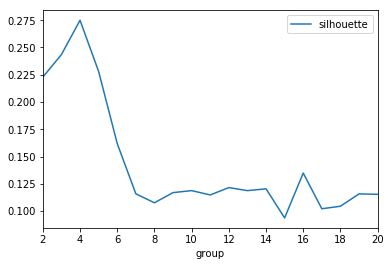

In [152]:
% pylab inline
import pandas
df = pandas.DataFrame(sil_ary)
df.plot(x = 'group', y = 'silhouette', kind = 'line')

In [153]:
import pandas
news = pandas.read_excel('https://raw.githubusercontent.com/ywchiu/pytextmining/master/data/20171214news.xlsx', index_col = 0)

In [154]:
news.head()

,category,content,link,title
0,政治,新增：立委說法民進黨立法院黨團預計在明天的院會中，讓改制農田水利會的《農田水利會組織通則》修...,https://tw.news.appledaily.com/politics/realti...,【更新】水利會改官派明闖關 綠委24小時前顧議場大門防藍突襲
1,論壇,邱俊棠／台中市民、見習醫師；曾任台灣醫學生聯合會對外副會長對於公民參與公眾事務而能得到單位首...,https://tw.news.appledaily.com/forum/realtime/...,請中市府為所當為 加速中火燃煤限制
2,社會,被控來台涉發展情報組織的中國學生周泓旭，因接觸我方外交部官員而露餡落網，今年9月被台北地院一...,https://tw.news.appledaily.com/local/realtime/...,陸生共諜嗆台司法 「不敢公開審理我」
3,生活,【廣編特輯】 對於全能神教會在中國所遭受的迫害與在韓國、香港及臺灣所面對的反面宣傳，非政府組...,https://tw.news.appledaily.com/life/realtime/2...,【特企】NGO聯名譴責中共迫害宗教信仰
4,生活,立法院交通委員會今審查《道路交通管理處罰條例》，通過營業大客車駕駛人行駛一般道路未繫安全帶，...,https://tw.news.appledaily.com/life/realtime/2...,乘客搭大客車不配合繫安全帶 立院初審通過可罰6千元


In [155]:
import jieba
jieba.load_userdict('userdict.txt')
titles = []
corpus = []
for rec in news.iterrows():
    titles.append(rec[1].title)
    corpus.append(' '.join(jieba.cut(rec[1].content)))


In [156]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

In [157]:
from sklearn.metrics.pairwise import cosine_similarity
n_cosine_similarities  = cosine_similarity(X)

In [158]:
from sklearn.metrics import silhouette_score
sil_ary = []
for k in range(2,21):
    km = cluster.KMeans(n_clusters = k, init='k-means++', random_state=42)
    c = km.fit_predict(n_cosine_similarities)
    sil_ary.append({'group':k,
                    'silhouette':silhouette_score(n_cosine_similarities, labels=c)})


Populating the interactive namespace from numpy and matplotlib


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['rec']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


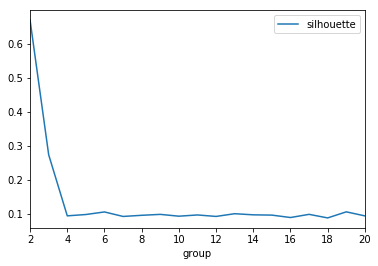

In [159]:
% pylab inline
import pandas
df = pandas.DataFrame(sil_ary)
df.plot(x = 'group', y = 'silhouette', kind = 'line')

## 社群偵測法

In [160]:
import pandas
news = pandas.read_excel('https://raw.githubusercontent.com/ywchiu/pytextmining/master/data/20171214news.xlsx', index_col = 0)

In [161]:
news.head()

,category,content,link,title
0,政治,新增：立委說法民進黨立法院黨團預計在明天的院會中，讓改制農田水利會的《農田水利會組織通則》修...,https://tw.news.appledaily.com/politics/realti...,【更新】水利會改官派明闖關 綠委24小時前顧議場大門防藍突襲
1,論壇,邱俊棠／台中市民、見習醫師；曾任台灣醫學生聯合會對外副會長對於公民參與公眾事務而能得到單位首...,https://tw.news.appledaily.com/forum/realtime/...,請中市府為所當為 加速中火燃煤限制
2,社會,被控來台涉發展情報組織的中國學生周泓旭，因接觸我方外交部官員而露餡落網，今年9月被台北地院一...,https://tw.news.appledaily.com/local/realtime/...,陸生共諜嗆台司法 「不敢公開審理我」
3,生活,【廣編特輯】 對於全能神教會在中國所遭受的迫害與在韓國、香港及臺灣所面對的反面宣傳，非政府組...,https://tw.news.appledaily.com/life/realtime/2...,【特企】NGO聯名譴責中共迫害宗教信仰
4,生活,立法院交通委員會今審查《道路交通管理處罰條例》，通過營業大客車駕駛人行駛一般道路未繫安全帶，...,https://tw.news.appledaily.com/life/realtime/2...,乘客搭大客車不配合繫安全帶 立院初審通過可罰6千元


In [162]:
import jieba
jieba.load_userdict('userdict.txt')
titles = []
corpus = []
for rec in news.iterrows():
    titles.append(rec[1].title)
    corpus.append(' '.join(jieba.cut(rec[1].content)))


In [163]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

In [164]:
from sklearn.metrics.pairwise import cosine_similarity
n_cosine_similarities  = cosine_similarity(X)

In [165]:
n_cosine_similarities.shape

(899, 899)

In [166]:
n_cosine_similarities >= 0.5

array([[ True, False, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       [False, False,  True, ..., False, False, False],
       ...,
       [False, False, False, ...,  True, False, False],
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False,  True]])

In [167]:
(n_cosine_similarities >= 0.5).astype(int)

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]])

In [168]:
(n_cosine_similarities >= 0.5).astype(int).sum()

2097

In [169]:
import networkx as nx
m = (n_cosine_similarities >= 0.5).astype(int)
G = nx.from_numpy_matrix(m)

In [170]:
type(G)

networkx.classes.graph.Graph

## 安裝Python Louvain
- pip install python-louvain

In [171]:
! pip install python-louvain

You are using pip version 9.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [172]:
import community
comm = community.best_partition(G)


In [174]:
cluster_ary = np.array(list(comm.values()) )


In [175]:
from collections import Counter
c = Counter(cluster_ary)
c.most_common(30)

[(3, 30),
 (69, 19),
 (113, 8),
 (45, 5),
 (140, 5),
 (66, 4),
 (141, 4),
 (198, 4),
 (337, 4),
 (17, 3),
 (183, 3),
 (188, 3),
 (243, 3),
 (380, 3),
 (428, 3),
 (552, 3),
 (628, 3),
 (19, 2),
 (29, 2),
 (55, 2),
 (56, 2),
 (106, 2),
 (109, 2),
 (111, 2),
 (134, 2),
 (138, 2),
 (139, 2),
 (142, 2),
 (152, 2),
 (154, 2)]

In [176]:
len(c)

769

In [177]:
titles_ary  = np.array(titles)


In [185]:
titles_ary[cluster_ary == 45]

array(['後天入冬最強冷空氣來襲\u3000低溫下探12℃', '像灑了糖霜！玉山今晨降雪\u3000積雪0.5公分',
       '明溫暖舒適！\u3000吳德榮：周六變天下探11℃', '輕颱啟德恐生成\u3000入冬最強冷空氣周末來襲下探11℃（動畫）',
       '吳德榮：周六冷空氣報到探11℃\u3000冷到下周一'], dtype='<U36')

In [206]:
for group, cnt in c.most_common(3):
    articles = titles_ary[cluster_ary == group]
    print('group', group)
    print('======================')
    for news in articles:
        print(news)


group 3
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
group 69
【狗仔偷拍】小嫻搬離何守正家租66坪房　月租6萬元
許聖梅心疼小嫻被當空氣　爆何守正「有兩個女學員」
【動畫解盤】毒菇跳火線譙seafood　小嫻難瘦香菇
不捨善良小嫻慘遭婚變　乃哥「命運捉弄人」
【獨家】小嫻賣房求子　婆婆竟拒入籍何家
小心！在美結婚台灣沒登記　偷腥照樣能捉姦
小嫻離婚導火線　拉何守正信妙禪
小嫻別傻傻被欺負！女律師說「姐寶」就要這樣對付
小嫻守正結婚在台沒登記　想離婚只有兩條路
大姑出面護弟！轟小嫻不能生「媽媽是全台最沒有尊嚴的婆婆」
小嫻信奉妙禪　關鍵原因與何守正有關！
小嫻何守正想離婚　必須先做這件事！
「小嫻不快樂！」　許聖梅：何守正虧欠她
【內幕動畫】小嫻婚變何守正姊反擊　不滿媽煮飯侍奉星媳婦
小嫻多信妙禪？　曾見證「師父帶我跳舞」
小嫻婚變無徵兆　男星嘆：兩人向來出雙入對
【獨家內幕】太傷！小嫻被分手　何守正當小三面前攤牌
【

In [202]:
pos = np.squeeze(np.asarray(X[cluster_ary == 69].sum(axis = 0))).argsort()[::-1]

In [203]:
feature_name = numpy.array(vectorizer.get_feature_names())
feature_name[pos[0:10]]

array(['小嫻', '何守', '離婚', '結婚', '美國', '時間', '守正', '表示', '台灣', '婚姻'],
      dtype='<U18')

In [205]:
for group, cnt in c.most_common(3):
    articles = titles_ary[cluster_ary == group]
    pos = np.squeeze(np.asarray(X[cluster_ary == group].sum(axis = 0))).argsort()[::-1]
    print('group', group)
    print('keyword', feature_name[pos[0:10]])
    print('======================')
    for news in articles:
        print(news)


group 3
keyword ['全能' '神教' '中國' '宗教自由' '宗教' '國際' '組織' '遭受' '迫害' '成員']
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
group 69
keyword ['小嫻' '何守' '離婚' '結婚' '美國' '時間' '守正' '表示' '台灣' '婚姻']
【狗仔偷拍】小嫻搬離何守正家租66坪房　月租6萬元
許聖梅心疼小嫻被當空氣　爆何守正「有兩個女學員」
【動畫解盤】毒菇跳火線譙seafood　小嫻難瘦香菇
不捨善良小嫻慘遭婚變　乃哥「命運捉弄人」
【獨家】小嫻賣房求子　婆婆竟拒入籍何家
小心！在美結婚台灣沒登記　偷腥照樣能捉姦
小嫻離婚導火線　拉何守正信妙禪
小嫻別傻傻被欺負！女律師說「姐寶」就要這樣對付
小嫻守正結婚在台沒登記　想離婚只有兩條路
大姑出面護弟！轟小嫻不能生「媽媽是全台最沒有尊嚴的婆婆」
小嫻信奉妙禪　關鍵原因與何守正有關！
小嫻何守正想離婚　必須先